# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Raditya Naufal Abiyu
- **Email:** raditya.naufal.a@gmail.com
- **ID Dicoding:** raditss

## Menentukan Pertanyaan Bisnis

- how does the day of the week correlate to peak hour of the rental?
- How does weather and season impacted the total rental of the bike?

## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

In [4]:
hour_data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- hourly data have 17379 entries
- daily data have 731 entries
- both have 16 similar fields that are
  - dteday: Date of observation
  - season: Season of the year
  - yr: Year (0 = 2011, 1 = 2012)
  - mnth: Month of the year
  - holiday: Whether the day was a holiday
  - weekday: Day of the week
  - workingday: Whether the day was a working day
  - weathersit: Weather situation (e.g., clear, cloudy, etc.)
  - temp: Normalized temperature
  - atemp: Normalized "feels-like" temperature
  - hum: Normalized humidity
  - windspeed: Normalized wind speed
  - casual: Number of casual (non-registered) bike rentals
  - registered: Number of registered bike rentals
  - cnt: Total bike rentals
- hourly data have 1 extra field called hours

### Assessing Data

In [8]:
print("Data assesment for day data")
print("null data:")
print(day_data.isnull().sum())
print("duplicate data:",end = " ")
print(day_data.duplicated().sum())

Data assesment for day data
null data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplicate data: 0


In [9]:
print("Data assesment for hour data")
print("null data:")
print(hour_data.isnull().sum())
print("duplicate data:",end = " ")
print(hour_data.duplicated().sum())

Data assesment for hour data
null data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplicate data: 0


**Insight:**
- there is no duplicate and null data in day_data
- there is no duplicate and null data in hour_data

### Cleaning Data

In [10]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

**Insight:**
- since there are no duplicate and null data no field or data needed to be dropped
- the date and time format can be change to pandas datetime format

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- The bike rental hour_data reveals that rentals are influenced by seasonal variations, weather conditions, and user types, with registered users significantly outnumbering casual riders, while temperature and humidity play critical roles in determining rental frequency.
- The dataset of 731 entries reveals that user activity peaks during favorable weather conditions, with an average total user count of 4,504, predominantly composed of registered users (3,656), while exhibiting significant trends related to seasonality, humidity, and low holiday occurrences, indicating a robust user base influenced by temperature and wind speed.

## Visualization & Explanatory Analysis

### Pertanyaan 1: how does the day of the week correlate to peak hour of the rental?

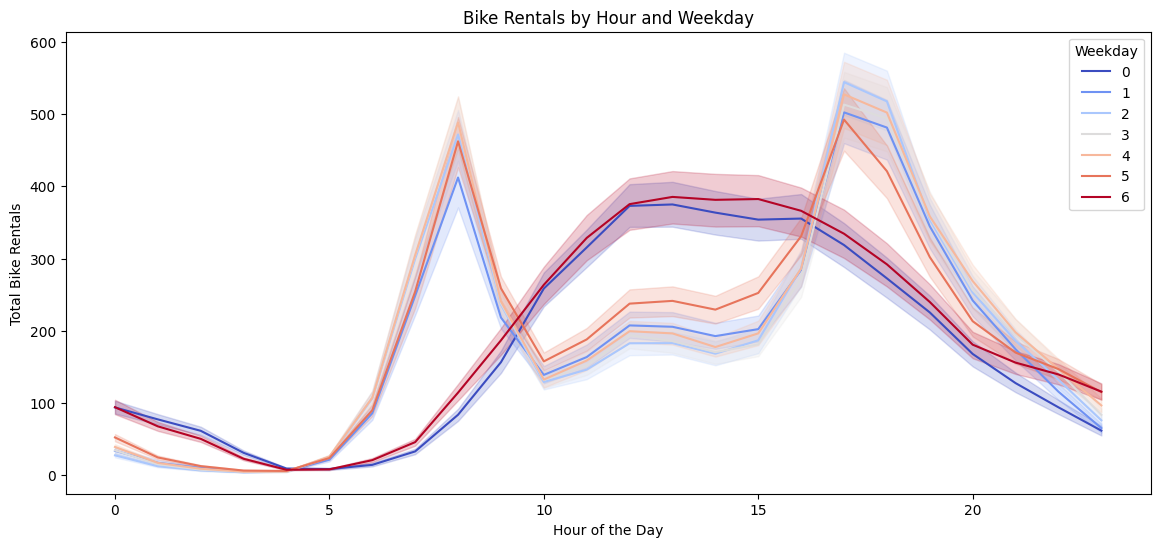

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', hue='weekday', data=hour_data, palette="coolwarm")
plt.title('Bike Rentals by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Weekday')
plt.show()

Bike Rentals by Hour and Weekday (Hourly Data):
- Rentals peak during the morning (8 AM) and evening (5-6 PM) on weekdays, likely due to commuting.
- On weekends, the trend is more spread out, with higher rentals in the afternoon.

### Pertanyaan 2: How does weather and season impacted the total rental of the bike?

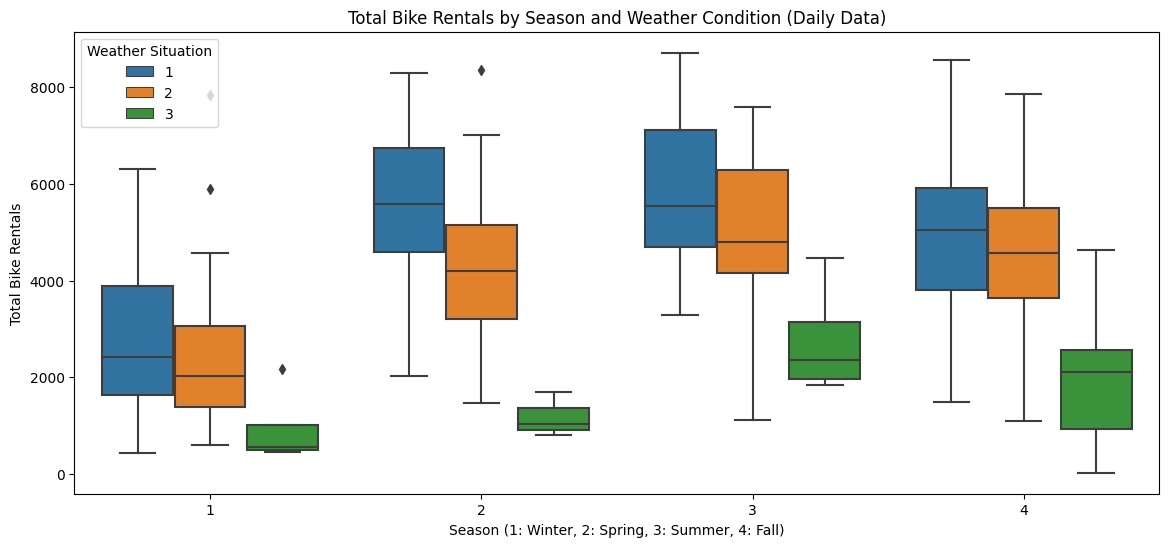

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=day_data)
plt.title('Total Bike Rentals by Season and Weather Condition (Daily Data)')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Weather Situation')
plt.show()


Total Bike Rentals by Season and Weather Condition (Daily Data):
- Rentals tend to be highest in the summer (season 3) and fall (season 4), regardless of the weather.
- Bad weather (weather situation 3) significantly reduces the number of rentals across all seasons.

**Insight:**
- The day of the week significantly related to the peak hour of the day. In the weekdays, the peak hour is on 8AM (start of the work hour) and 5-6PM (end of work hour) therefore we can conclude that on the weekdays people mainly rent the bike for commuting to work. On the weekend, the hour are more spread out because many people have different activities and schedule.
- summer and fall have a tendency to be have more rentals since the weather is warm. bad weather decreases the rental by a lot, we can conclude that people doesn't want to ride a bike when the weather is bad.

## Analisis Lanjutan (Opsional)

 **Impact of the temperature to the rentals**
 
We need to see this to confirm that temperature have a certain effect, not just the season.

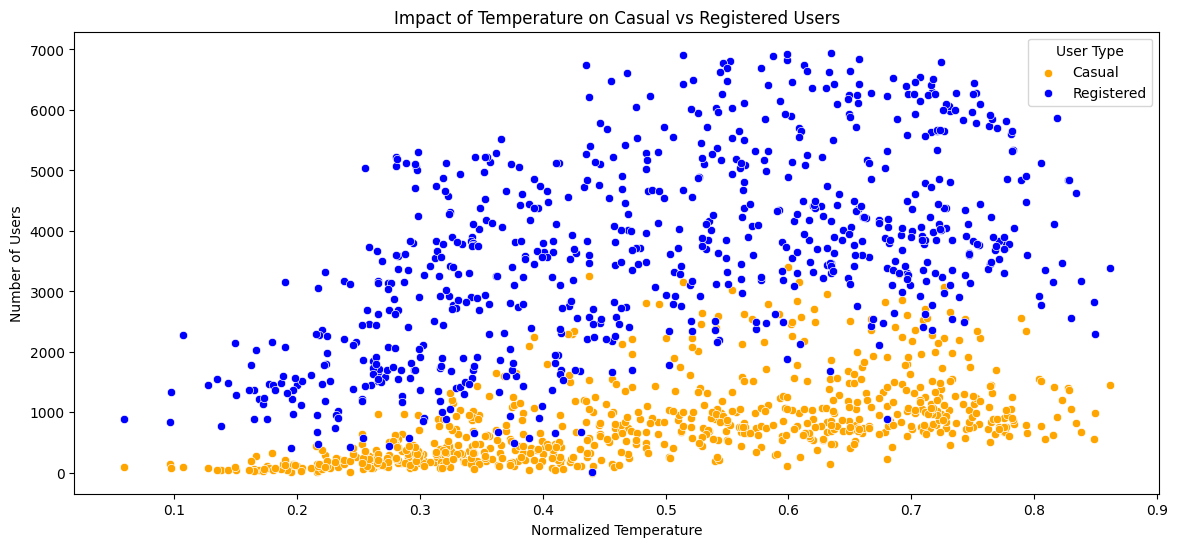

In [15]:

plt.figure(figsize=(14, 6))
sns.scatterplot(x='temp', y='casual', data=day_data, label='Casual', color='orange')
sns.scatterplot(x='temp', y='registered', data=day_data, label='Registered', color='blue')
plt.title('Impact of Temperature on Casual vs Registered Users')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.show()


Impact of Temperature on Casual vs. Registered Users:

Both casual and registered users increase their usage as the temperature rises, but casual users tend to show more variability.
Registered users show a more consistent increase in bike usage as temperatures climb.

**Casual VS Registered User**

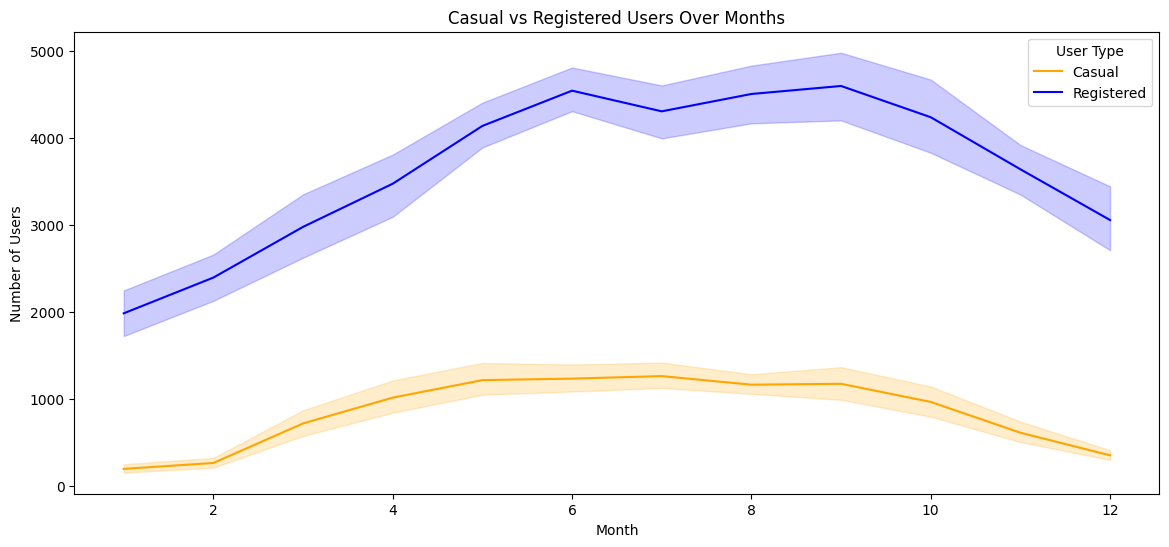

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='mnth', y='casual', data=day_data, label='Casual', color='orange')
sns.lineplot(x='mnth', y='registered', data=day_data, label='Registered', color='blue')
plt.title('Casual vs Registered Users Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.show()

**Casual vs Registered Users Over Months**

Registered users have a relatively steady pattern throughout the year, peaking in summer months.
Casual users show more variation, with a significant spike during the warmer months (May to September)

## Conclusion

- The day of the weeks correlate closely with the peak hour of the rentals. It showns that on weekday users use it for commutingto work while on the weekend people have different schedule so the peak time are less noticeable.
- The seasons and weather have a significant effect on the total rentals of the bike. Warmer season have a significantly higher rental count than cold season. The weather also greatly impacted the total number of rentals. 